In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import Data 
df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/master/medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Task 1: 
Add 'overweight' column

In [3]:
# Method 1: Using np.where()
#df['BMI'] = df['weight'] / (df['height'] / 100) ** 2 
#df['BMI'] = np.where(df['BMI'] > 25, 1, 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
# Method 2: Using lambda 
df['overweight'] = (df['weight'] / (df['height']/100)**2).apply(lambda x: 1 if x > 25 else 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


# Task 2
Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [5]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


# Task 3 
Draw categorical plot

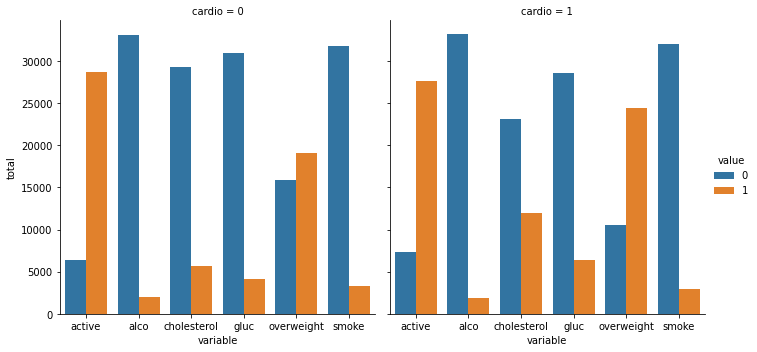

In [8]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
df_cat = pd.melt(df, var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars = 'cardio')

 # Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")

fig = fig.fig 
fig.savefig('catplot.png')

# Task 4
Draw heat map

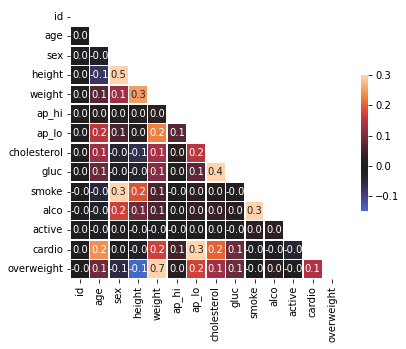

In [7]:
# Clean the data
df_heat = df[
            (df['ap_lo']<=df['ap_hi']) &
            (df['height'] >= df['height'].quantile(0.025))&
            (df['height'] <= df['height'].quantile(0.975))&
            (df['weight'] >= df['weight'].quantile(0.025))&
            (df['weight'] <= df['weight'].quantile(0.975))
          ]

# Calculate the correlation matrix
corr = df_heat.corr()
    
# Generate a mask for the upper triangle
mask = np.triu(corr)
    
# Create the canvas for plotting
fig, ax = plt.subplots(figsize=(7, 5))
    
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr,mask=mask, 
            fmt='.1f',
            vmax=.3, 
            linewidths=.5,
            square=True, 
            cbar_kws = {'shrink':0.5},
            annot=True, 
            center=0)

fig.savefig('heatmap.png')